# Urban Heat Island (UHI) Benchmark Notebook 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows  
from rasterio import features  
from rasterio import warp
from rasterio.warp import transform_bounds 
from rasterio.windows import from_bounds 

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [3]:
# Load the training data from csv file and display the first few rows to inspect the data
ground_df = pd.read_csv("/Users/kanghong/Documents/kang's codespace/EY Challenge 2025/Training_data_uhi_index_2025-02-18.csv")
ground_df.tail()

,Longitude,Latitude,datetime,UHI Index
11224,-73.957050,40.790333,24-07-2021 15:57,0.972470
11225,-73.957063,40.790308,24-07-2021 15:57,0.972470
11226,-73.957093,40.790270,24-07-2021 15:57,0.981124
11227,-73.957112,40.790253,24-07-2021 15:59,0.981245
11228,-73.957128,40.790237,24-07-2021 15:59,0.983408


In [5]:
ground_df["datetime"].value_counts()

datetime
24-07-2021 15:55    317
24-07-2021 15:52    302
24-07-2021 15:31    300
24-07-2021 15:32    293
24-07-2021 15:39    275
24-07-2021 15:36    272
24-07-2021 15:57    262
24-07-2021 15:59    259
24-07-2021 15:50    254
24-07-2021 15:54    249
24-07-2021 15:53    248
24-07-2021 15:51    243
24-07-2021 15:37    241
24-07-2021 15:46    239
24-07-2021 15:42    238
24-07-2021 15:30    235
24-07-2021 15:48    234
24-07-2021 15:44    230
24-07-2021 15:56    228
24-07-2021 15:35    225
24-07-2021 15:22    222
24-07-2021 15:23    222
24-07-2021 15:24    222
24-07-2021 15:49    218
24-07-2021 15:43    212
24-07-2021 15:26    208
24-07-2021 15:25    207
24-07-2021 15:12    206
24-07-2021 15:45    204
24-07-2021 15:28    201
24-07-2021 15:16    200
24-07-2021 15:58    200
24-07-2021 15:47    195
24-07-2021 15:38    187
24-07-2021 15:15    181
24-07-2021 15:33    180
24-07-2021 15:40    180
24-07-2021 15:18    172
24-07-2021 15:21    155
24-07-2021 15:08    154
24-07-2021 15:27    154
24-07-2

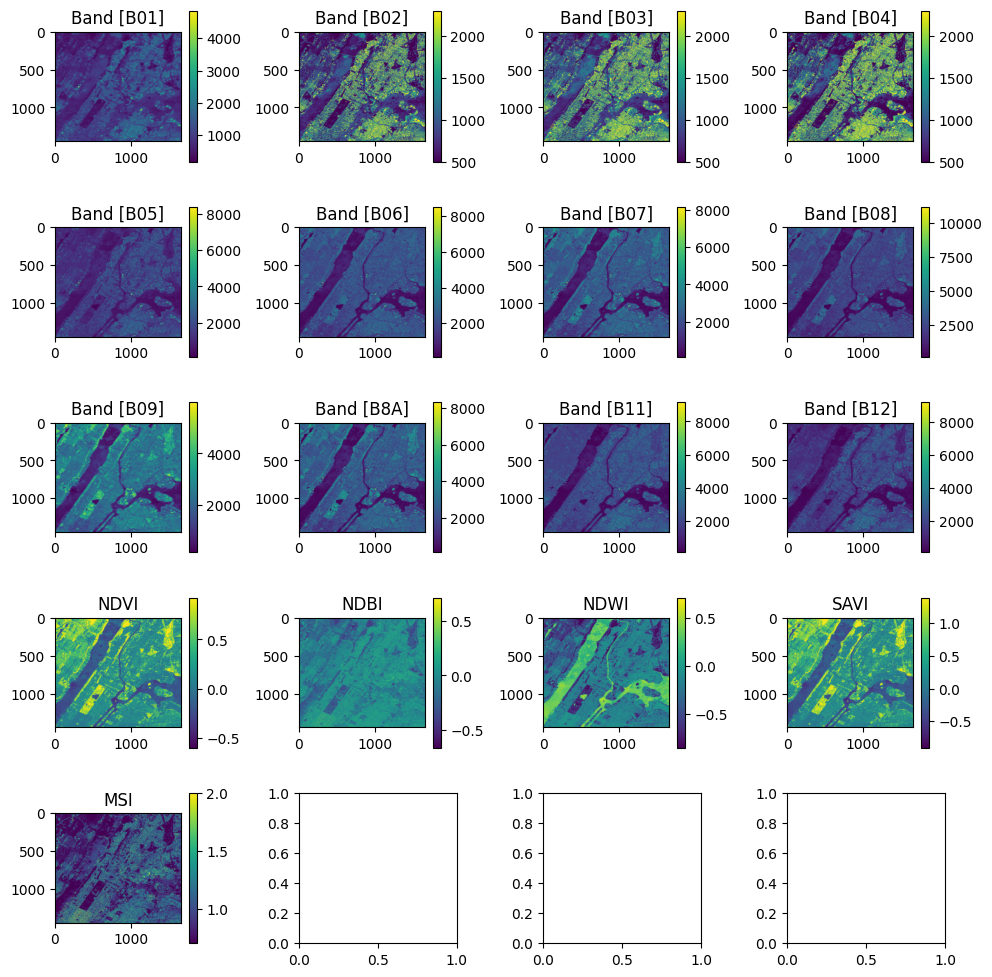

In [7]:
# Open the GeoTIFF file
tiff_path = "S2_sample.tiff"

# Read the bands from the GeoTIFF file
with rasterio.open(tiff_path) as src1:
    band1 = src1.read(1)  # Band [B01]
    band2 = src1.read(2)  # Band [B02]
    band3 = src1.read(3)  # Band [B03]
    band4 = src1.read(4)  # Band [B04]
    band5 = src1.read(5)  # Band [B05]
    band6 = src1.read(6)  # Band [B06]
    band7 = src1.read(7)  # Band [B06]
    band8 = src1.read(8)  # Band [B08]
    band9 = src1.read(9)  # Band [B09]
    band10 = src1.read(10)  # Band [B8A]
    band11 = src1.read(11)  # Band [B11]
    band12 = src1.read(12)  # Band [B12]
    band13 = src1.read(13)  # NDVI
    band14 = src1.read(14)  # NDBI
    band15 = src1.read(15)  # NDWI
    band16 = src1.read(16)  # SAVI
    band17 = src1.read(17)  # MSI

# Plot the bands in a 2x2 grid
fig, axes = plt.subplots(5, 4, figsize=(10, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot the first band (B01)
im1 = axes[0].imshow(band1, cmap='viridis')
axes[0].set_title('Band [B01]')
fig.colorbar(im1, ax=axes[0])

# Plot the second band (B02)
im2 = axes[1].imshow(band2, cmap='viridis', vmin=500, vmax=2300)
axes[1].set_title('Band [B02]')
fig.colorbar(im2, ax=axes[1])

# Plot the third band (B03)
im3 = axes[2].imshow(band3, cmap='viridis', vmin=500, vmax=2300)                 
axes[2].set_title('Band [B03]')
fig.colorbar(im3, ax=axes[2])

# Plot the fourth band (B04)
im4 = axes[3].imshow(band4, cmap='viridis', vmin=500, vmax=2300)
axes[3].set_title('Band [B04]')
fig.colorbar(im4, ax=axes[3])

# Plot the fifth band (B05)
im5 = axes[4].imshow(band5, cmap='viridis')
axes[4].set_title('Band [B05]')
fig.colorbar(im5, ax=axes[4])

# Plot the sixth band (B06)
im6 = axes[5].imshow(band6, cmap='viridis')
axes[5].set_title('Band [B06]')
fig.colorbar(im6, ax=axes[5])

# Plot the seventh band (B07)
im7 = axes[6].imshow(band7, cmap='viridis')
axes[6].set_title('Band [B07]')
fig.colorbar(im7, ax=axes[6])

# Plot the eigth band (B08)
im8 = axes[7].imshow(band8, cmap='viridis')
axes[7].set_title('Band [B08]')
fig.colorbar(im8, ax=axes[7])

# Plot the ninth band (B09)
im9 = axes[8].imshow(band9, cmap='viridis')
axes[8].set_title('Band [B09]')
fig.colorbar(im9, ax=axes[8])

# Plot the tenth band (B8A)
im10 = axes[9].imshow(band10, cmap='viridis')
axes[9].set_title('Band [B8A]')
fig.colorbar(im10, ax=axes[9])

# Plot the eleventh band (B11)
im11 = axes[10].imshow(band11, cmap='viridis')
axes[10].set_title('Band [B11]')
fig.colorbar(im11, ax=axes[10])

# Plot the twelvth band (B12)
im12 = axes[11].imshow(band12, cmap='viridis')
axes[11].set_title('Band [B12]')
fig.colorbar(im12, ax=axes[11])

# Plot the twelvth NDVI
im13 = axes[12].imshow(band13, cmap='viridis')
axes[12].set_title('NDVI')
fig.colorbar(im13, ax=axes[12])

# Plot the twelvth NDBI
im14 = axes[13].imshow(band14, cmap='viridis')
axes[13].set_title('NDBI')
fig.colorbar(im14, ax=axes[13])

# Plot the twelvth NDWI
im15 = axes[14].imshow(band15, cmap='viridis')
axes[14].set_title('NDWI')
fig.colorbar(im15, ax=axes[14])

# Plot the twelvth SAVI
im16 = axes[15].imshow(band16, cmap='viridis')
axes[15].set_title('SAVI')
fig.colorbar(im16, ax=axes[15])

# Plot the twelvth MSI
im17 = axes[16].imshow(band17, cmap='viridis', vmin=0.7, vmax=2)
axes[16].set_title('MSI')
fig.colorbar(im17, ax=axes[16])

plt.tight_layout()
plt.show()


In [9]:
# Extracts satellite band values from a GeoTIFF based on coordinates from a csv file and returns them in a DataFrame.

def map_satellite_data(tiff_path, csv_path):
    
    # Load the GeoTIFF data
    data = rxr.open_rasterio(tiff_path)
    tiff_crs = data.rio.crs

    # Read the Excel file using pandas
    df = pd.read_csv(csv_path)
    latitudes = df['Latitude'].values
    longitudes = df['Longitude'].values

    # 3. Convert lat/long to the GeoTIFF's CRS
    # Create a Proj object for EPSG:4326 (WGS84 - lat/long) and the GeoTIFF's CRS
    proj_wgs84 = Proj(init='epsg:4326')  # EPSG:4326 is the common lat/long CRS
    proj_tiff = Proj(tiff_crs)
    
    # Create a transformer object
    transformer = Transformer.from_proj(proj_wgs84, proj_tiff)

    lon_values = []
    lat_values = []
    B01_values = []
    B04_values = []
    B06_values = []
    B08_values = []
    B11_values = []
    B02_values = []
    B03_values = []
    B8A_values = []
    B12_values = []
    B05_values = []
    B07_values = []
    B09_values = []
    NDVI_values = []
    NDBI_values = []
    NDWI_values = []
    SAVI_values = []
    MSI_values = []

# Iterate over the latitudes and longitudes, and extract the corresponding band values
    for lat, lon in tqdm(zip(latitudes, longitudes), total=len(latitudes), desc="Mapping values"):
    # Assuming the correct dimensions are 'y' and 'x' (replace these with actual names from data.coords)
    
        B01_value = data.sel(x=lon, y=lat,  band=1, method="nearest").values
        B01_values.append(B01_value)
    
        B02_value = data.sel(x=lon, y=lat, band=2, method="nearest").values
        B02_values.append(B02_value)
        
        B03_value = data.sel(x=lon, y=lat, band=3, method="nearest").values
        B03_values.append(B03_value)
    
        B04_value = data.sel(x=lon, y=lat, band=4, method="nearest").values
        B04_values.append(B04_value)

        B05_value = data.sel(x=lon, y=lat, band=5, method="nearest").values
        B05_values.append(B05_value)

        B06_value = data.sel(x=lon, y=lat, band=6, method="nearest").values
        B06_values.append(B06_value)

        B07_value = data.sel(x=lon, y=lat, band=7, method="nearest").values
        B07_values.append(B07_value)

        B08_value = data.sel(x=lon, y=lat, band=8, method="nearest").values
        B08_values.append(B08_value)

        B09_value = data.sel(x=lon, y=lat, band=9, method="nearest").values
        B09_values.append(B09_value)

        B8A_value = data.sel(x=lon, y=lat, band=10, method="nearest").values
        B8A_values.append(B8A_value)

        B11_value = data.sel(x=lon, y=lat, band=11, method="nearest").values
        B11_values.append(B11_value)

        B12_value = data.sel(x=lon, y=lat, band=12, method="nearest").values
        B12_values.append(B12_value)

        NDVI_value = data.sel(x=lon, y=lat, band=13, method="nearest").values
        NDVI_values.append(NDVI_value)

        NDBI_value = data.sel(x=lon, y=lat, band=14, method="nearest").values
        NDBI_values.append(NDBI_value)

        NDWI_value = data.sel(x=lon, y=lat, band=15, method="nearest").values
        NDWI_values.append(NDWI_value)

        SAVI_value = data.sel(x=lon, y=lat, band=16, method="nearest").values
        SAVI_values.append(SAVI_value)

        MSI_value = data.sel(x=lon, y=lat, band=17, method="nearest").values
        MSI_values.append(MSI_value)

        lon_values.append(lon)
        lat_values.append(lat)

    # Create a DataFrame with the band values
    # Create a DataFrame to store the band values
    df = pd.DataFrame()
    df['longitudes'] = lon_values
    df['latitudes'] = lat_values
    df['B01'] = B01_values
    df['B02'] = B02_values
    df['B03'] = B03_values
    df['B04'] = B04_values
    df['B05'] = B05_values
    df['B06'] = B06_values
    df['B07'] = B07_values
    df['B08'] = B08_values
    df['B09'] = B09_values
    df['B8A'] = B8A_values
    df['B11'] = B11_values
    df['B12'] = B12_values
    df['NDVI'] = NDVI_values
    df['NDBI'] = NDBI_values
    df['NDWI'] = NDWI_values
    df['SAVI'] = SAVI_values
    df['MSI'] = MSI_values
    
    return df


In [11]:
# Extracts landsat values from a GeoTIFF based on coordinates from a csv file and returns them in a DataFrame.

def map_landsat_data(tiff_path, csv_path):
    
    # Load the GeoTIFF data
    data = rxr.open_rasterio(tiff_path)
    tiff_crs = data.rio.crs

    # Read the Excel file using pandas
    df = pd.read_csv(csv_path)
    latitudes = df['Latitude'].values
    longitudes = df['Longitude'].values

    # 3. Convert lat/long to the GeoTIFF's CRS
    # Create a Proj object for EPSG:4326 (WGS84 - lat/long) and the GeoTIFF's CRS
    proj_wgs84 = Proj(init='epsg:4326')  # EPSG:4326 is the common lat/long CRS
    proj_tiff = Proj(tiff_crs)
    
    # Create a transformer object
    transformer = Transformer.from_proj(proj_wgs84, proj_tiff)

    lon_values = []
    lat_values = []
    lwir11_values = []
    swir16_values = []
    swir22_values = []

# Iterate over the latitudes and longitudes, and extract the corresponding band values
    for lat, lon in tqdm(zip(latitudes, longitudes), total=len(latitudes), desc="Mapping values"):
    # Assuming the correct dimensions are 'y' and 'x' (replace these with actual names from data.coords)
    
        lwir11_value = data.sel(x=lon, y=lat,  band=1, method="nearest").values
        lwir11_values.append(lwir11_value)

        swir16_value = data.sel(x=lon, y=lat,  band=2, method="nearest").values
        swir16_values.append(swir16_value)

        swir22_value = data.sel(x=lon, y=lat,  band=3, method="nearest").values
        swir22_values.append(swir22_value)

        lon_values.append(lon)
        lat_values.append(lat)

    # Create a DataFrame with the band values
    # Create a DataFrame to store the band values
    df = pd.DataFrame()
    df['longitudes'] = lon_values
    df['latitudes'] = lat_values
    df['lwir11'] = lwir11_values
    df['swir16'] = swir16_values
    df['swir22'] = swir22_values
    
    return df


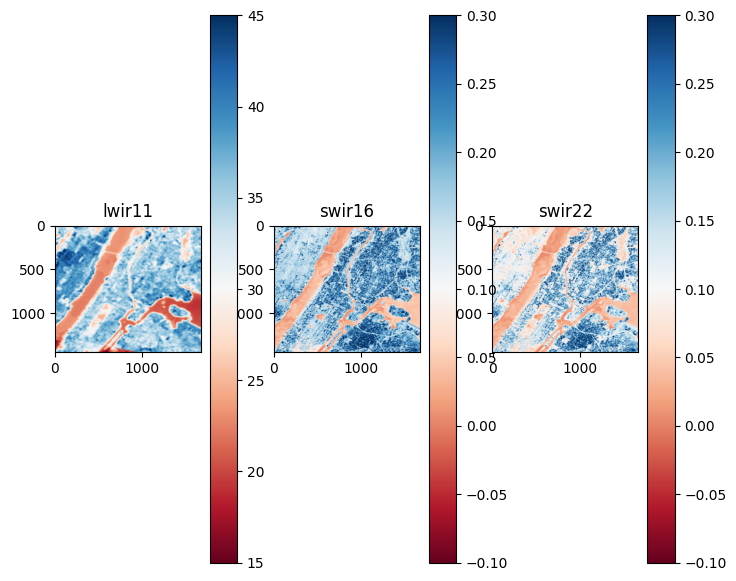

In [13]:
# Reads and plots lwir11 from the GeoTIFF file.

# Path to the GeoTIFF file
tiff_path = "Landsat_LST.tiff"

# Read the bands from the GeoTIFF file
with rasterio.open(tiff_path) as src:
    band1 = src.read(1)  # lwir11
    band2 = src.read(2)  # swir16
    band3 = src.read(3)  # swir22

# Plot the bands in a 2x2 grid
fig, axes = plt.subplots(1, 3, figsize=(8, 8))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot the first band (B01)
im1 = axes[0].imshow(band1, cmap='RdBu', vmin=15, vmax=45.0)
axes[0].set_title('lwir11')
fig.colorbar(im1, ax=axes[0])

# Plot the second band (B04)
im2 = axes[1].imshow(band2, cmap='RdBu', vmin=-0.1, vmax=0.30)
axes[1].set_title('swir16')
fig.colorbar(im2, ax=axes[1])

# Plot the third band (B06)
im3 = axes[2].imshow(band3, cmap='RdBu', vmin=-0.1, vmax=0.30)                 
axes[2].set_title('swir22')
fig.colorbar(im3, ax=axes[2])

# Display the plot
plt.show()


In [15]:
# Mapping satellite data with training data.
satellite_data = map_satellite_data('S2_sample.tiff', 'Training_data_uhi_index_2025-02-18.csv')

Mapping values: 100%|████████████████| 11229/11229 [00:58<00:00, 191.55it/s]


In [16]:
# Mapping landsat data with training data.
landsat_data = map_landsat_data('Landsat_LST.tiff', 'Training_data_uhi_index_2025-02-18.csv')

Mapping values: 100%|███████████████| 11229/11229 [00:09<00:00, 1143.12it/s]


In [19]:
satellite_data.head()

,longitudes,latitudes,B01,B02,B03,B04,B05,B06,B07,B08,B09,B8A,B11,B12,NDVI,NDBI,NDWI,SAVI,MSI
0,-73.909167,40.813107,846.0,1064.0,1166.0,1240.0,1528.0,1688.0,1754.0,1834.0,2190.0,1730.0,1796.0,1540.0,0.19323357189329862,-0.01046831955922865,-0.22266666666666668,0.2898032200357782,0.9792802617230099
1,-73.909187,40.813045,846.0,1064.0,1166.0,1240.0,1528.0,1688.0,1754.0,1834.0,2190.0,1730.0,1796.0,1540.0,0.19323357189329862,-0.01046831955922865,-0.22266666666666668,0.2898032200357782,0.9792802617230099
2,-73.909215,40.812978,846.0,670.0,828.0,810.0,1147.0,1954.0,2138.0,2292.0,2190.0,2353.0,1566.0,1170.0,0.47775628626692457,-0.18818040435458788,-0.46923076923076923,0.71651893634166,0.6832460732984293
3,-73.909242,40.812908,846.0,631.0,782.0,745.0,1147.0,1954.0,2138.0,2218.0,2190.0,2353.0,1566.0,1170.0,0.49713128585892674,-0.17230443974630022,-0.4786666666666667,0.7455711152353636,0.7060414788097386
4,-73.909257,40.812845,846.0,664.0,758.0,712.0,1099.0,1823.0,2141.0,2210.0,2190.0,2229.0,1658.0,1240.0,0.5126625598904859,-0.14270941054808686,-0.48921832884097033,0.7688622754491018,0.7502262443438914


In [21]:
landsat_data.head()

,longitudes,latitudes,lwir11,swir16,swir22
0,-73.909167,40.813107,38.795558450000016,0.1674825,0.13746625
1,-73.909187,40.813045,38.795558450000016,0.1674825,0.13746625
2,-73.909215,40.812978,38.09828237000002,0.134455,0.09243499999999999
3,-73.909242,40.812908,38.09828237000002,0.134455,0.09243499999999999
4,-73.909257,40.812845,38.09828237000002,0.134455,0.09243499999999999


In [23]:
final_data = pd.merge(satellite_data, landsat_data, on=['longitudes', 'latitudes'], how='inner')
# final_data = final_data.drop(['longitudes', 'latitudes'], axis=1)
final_data.head()

,longitudes,latitudes,B01,B02,B03,B04,B05,B06,B07,B08,B09,B8A,B11,B12,NDVI,NDBI,NDWI,SAVI,MSI,lwir11,swir16,swir22
0,-73.909167,40.813107,846.0,1064.0,1166.0,1240.0,1528.0,1688.0,1754.0,1834.0,2190.0,1730.0,1796.0,1540.0,0.19323357189329862,-0.01046831955922865,-0.22266666666666668,0.2898032200357782,0.9792802617230099,38.795558450000016,0.1674825,0.13746625
1,-73.909187,40.813045,846.0,1064.0,1166.0,1240.0,1528.0,1688.0,1754.0,1834.0,2190.0,1730.0,1796.0,1540.0,0.19323357189329862,-0.01046831955922865,-0.22266666666666668,0.2898032200357782,0.9792802617230099,38.795558450000016,0.1674825,0.13746625
2,-73.909215,40.812978,846.0,670.0,828.0,810.0,1147.0,1954.0,2138.0,2292.0,2190.0,2353.0,1566.0,1170.0,0.47775628626692457,-0.18818040435458788,-0.46923076923076923,0.71651893634166,0.6832460732984293,38.09828237000002,0.134455,0.09243499999999999
3,-73.909242,40.812908,846.0,631.0,782.0,745.0,1147.0,1954.0,2138.0,2218.0,2190.0,2353.0,1566.0,1170.0,0.49713128585892674,-0.17230443974630022,-0.4786666666666667,0.7455711152353636,0.7060414788097386,38.09828237000002,0.134455,0.09243499999999999
4,-73.909257,40.812845,846.0,664.0,758.0,712.0,1099.0,1823.0,2141.0,2210.0,2190.0,2229.0,1658.0,1240.0,0.5126625598904859,-0.14270941054808686,-0.48921832884097033,0.7688622754491018,0.7502262443438914,38.09828237000002,0.134455,0.09243499999999999


In [25]:
# Combine two datasets vertically (along columns) using pandas concat function.
# def combine_two_datasets(dataset1,dataset2):
#     '''
#     Returns a  vertically concatenated dataset.
#     Attributes:
#     dataset1 - Dataset 1 to be combined 
#     dataset2 - Dataset 2 to be combined
#     '''
#     
#     data = pd.concat([dataset1,dataset2], axis=1)
#     return data

In [27]:
# Combining ground data and final data into a single dataset.
# uhi_data = combine_two_datasets(ground_df,final_data)
# uhi_data.head()

In [29]:
# Remove duplicate rows from the DataFrame based on specified columns and keep the first occurrence
# columns_to_check = ['B01','B02','B03','B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B8A', 'B11', 'B12', 
#                     'NDVI', 'NDBI', 'NDWI','SAVI', 'MSI', 'lwir11', 'swir16', 'swir22']
# for col in columns_to_check:
#     # Check if the value is a numpy array and has more than one dimension
#     final_data[col] = final_data[col].apply(lambda x: tuple(x) if isinstance(x, np.ndarray) and x.ndim > 0 else x)

# Now remove duplicates
# final_data = final_data.drop_duplicates(subset=columns_to_check, keep='first')
# final_data.head()

In [31]:
# Resetting the index of the dataset
# final_data=final_data.reset_index(drop=True)

### Data Preprocessing

In [34]:
for i in range(2, final_data.shape[1]):
    band_data = final_data.iloc[:,i]
    print(f"  - {final_data.columns[i]}: Min={np.nanmin(band_data):.4f}, Max={np.nanmax(band_data):.4f}")

  - B01: Min=265.0000, Max=2849.0000
  - B02: Min=267.0000, Max=5260.0000
  - B03: Min=317.0000, Max=5352.0000
  - B04: Min=234.0000, Max=5736.0000
  - B05: Min=387.0000, Max=5175.0000
  - B06: Min=520.0000, Max=5031.0000
  - B07: Min=592.0000, Max=4958.0000
  - B08: Min=288.0000, Max=5340.0000
  - B09: Min=977.0000, Max=4479.0000
  - B8A: Min=468.0000, Max=4876.0000
  - B11: Min=767.0000, Max=5475.0000
  - B12: Min=710.0000, Max=5635.0000
  - NDVI: Min=-0.2617, Max=0.8937
  - NDBI: Min=-0.4344, Max=0.5738
  - NDWI: Min=-0.8068, Max=0.3117
  - SAVI: Min=-0.3923, Max=1.3405
  - MSI: Min=0.3943, Max=3.6925
  - lwir11: Min=26.4514, Max=46.1973
  - swir16: Min=0.0463, Max=0.6384
  - swir22: Min=0.0388, Max=0.5954


In [36]:
from scipy.spatial import cKDTree

#Function to extract spectral index values from the tiff file
def get_patch_stats(lat_array, lon_array, uhi_data, patch_size):
    """
    Extracts an (2*patch_size+1) x (2*patch_size+1) patch of pixels around each lat/lon.
    Computes summary statistics for each band: mean, std, min, max, median, range.

    patch_size=50 => 101×101 patch
    Returns shape: (N, band_count * 6)
    """
    spectral_columns = [col for col in uhi_data.columns ]
    n_features = len(spectral_columns)
    
    out = np.zeros((len(lat_array), n_features * 6), dtype=np.float64) # Each band with 6 computed features

    kernel_dtree = cKDTree(ground_df[['Latitude', 'Longitude']].values)

    for i, (lat, lon) in enumerate(zip(lat_array, lon_array)):
        idx = kernel_dtree.query_ball_point([lat, lon], patch_size)

        patch_data = uhi_data.iloc[idx][spectral_columns].values.astype(np.float64)

        feats = []
        for b_i in range(n_features):
            band_arr = patch_data[:,b_i]
            mean_val = np.nanmean(band_arr)
            std_val  = np.nanstd(band_arr)
            min_val  = np.nanmin(band_arr)
            max_val  = np.nanmax(band_arr)
            median_val = np.nanmedian(band_arr)
            range_val  = max_val - min_val
            feats.extend([mean_val, std_val, min_val, max_val, median_val, range_val])

        out[i, :] = feats

    out = np.nan_to_num(out, nan=0.0, posinf=0.0, neginf=0.0)
    return out

In [38]:
train_lats = ground_df["Latitude"].values
train_lons = ground_df["Longitude"].values
y = ground_df["UHI Index"].values

In [40]:
PATCH_SIZE = 0.001
print(f"\nExtracting an {round(PATCH_SIZE*111000)} meter patch around each point...")
train_patches = get_patch_stats(train_lats, train_lons, final_data, patch_size=PATCH_SIZE)
print("train_patches shape:", train_patches.shape)


Extracting an 111 meter patch around each point...
train_patches shape: (11229, 132)


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_patches)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

#### Random Forest Regressor

In [46]:
# Train the Random Forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Make predictions on the training data
rf_insample_predictions = rf_model.predict(X_train)

In [53]:
# calculate R-squared score for in-sample predictions
Y_train = y_train.tolist()
r2_score(Y_train, rf_insample_predictions)

0.9930710460219296

In [55]:
# Make predictions on the test data
rf_outsample_predictions = rf_model.predict(X_test)

In [57]:
# calculate R-squared score for out-sample predictions
Y_test = y_test.tolist()
r2_score(Y_test, rf_outsample_predictions)

0.9624939715778973

#### XGBoost Regressor

In [60]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=300,  
    learning_rate=0.025,  
    max_depth=12,  
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)

print("\nTraining XGBoost ...")
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


Training XGBoost ...
[0]	validation_0-rmse:0.01599
[1]	validation_0-rmse:0.01565
[2]	validation_0-rmse:0.01530
[3]	validation_0-rmse:0.01496
[4]	validation_0-rmse:0.01464
[5]	validation_0-rmse:0.01432
[6]	validation_0-rmse:0.01400
[7]	validation_0-rmse:0.01370
[8]	validation_0-rmse:0.01340
[9]	validation_0-rmse:0.01310
[10]	validation_0-rmse:0.01283
[11]	validation_0-rmse:0.01256
[12]	validation_0-rmse:0.01228
[13]	validation_0-rmse:0.01202
[14]	validation_0-rmse:0.01177
[15]	validation_0-rmse:0.01152
[16]	validation_0-rmse:0.01128
[17]	validation_0-rmse:0.01105
[18]	validation_0-rmse:0.01083
[19]	validation_0-rmse:0.01060
[20]	validation_0-rmse:0.01038
[21]	validation_0-rmse:0.01017
[22]	validation_0-rmse:0.00996
[23]	validation_0-rmse:0.00976
[24]	validation_0-rmse:0.00955
[25]	validation_0-rmse:0.00936
[26]	validation_0-rmse:0.00917
[27]	validation_0-rmse:0.00899
[28]	validation_0-rmse:0.00881
[29]	validation_0-rmse:0.00863
[30]	validation_0-rmse:0.00846
[31]	validation_0-rmse:0.00

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.025, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [62]:
xgb_preds = xgb_model.predict(X_test)
r2_val = r2_score(y_test, xgb_preds)
print(f"\nR² on test set = {r2_val:.4f}")


R² on test set = 0.9647


#### Hyperparameter Tuning Via RandomizedSearchCV

In [65]:
import scipy.stats as stats

param_dist = {
    'learning_rate': stats.uniform(0.01,0.1),
    'max_depth': stats.randint(3,12),
    'subsample': stats.uniform(0.5,0.5),
    'colsample_bytree': stats.uniform(0.5,0.5),
    'n_estimators': stats.randint(50,300)
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV 

# Initialize GridSearchCV with XGBoost regressor
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                           scoring='r2', cv=3, verbose=1, n_iter=10, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r_square = r2_score(y_test, y_pred)
print(f'R Squared: {r_square}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters:  {'colsample_bytree': 0.6872700594236812, 'learning_rate': 0.10507143064099161, 'max_depth': 10, 'n_estimators': 238, 'subsample': 0.7984250789732434}
Best Score:  0.9543017495571311
R Squared: 0.9636936572621684


In [71]:
band_stats = ["Mean", "Std", "Min", "Max", "Median", "Range"]
band_labels = [
    "Coastal Aerosol (B01)", "Blue (B02)", "Green (B03)", "Red (B04)",
    "Red Edge 1 (B05)", "Red Edge 2 (B06)", "Red Edge 3 (B07)", "NIR (B08)", 'Water Vapor (B09)',
    "Narrow NIR (B8A)", "SWIR 1 (B11)", "SWIR 2 (B12)",
    "NDVI", "NDBI", "NDWI", "SAVI", "MSI", "lwir11", "swir16", "swir22"
]

feature_names = [f"{band} - {stat}" for band in band_labels for stat in band_stats]

feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

print("\n Feature Importance (Most Dominant to Least in UHI Prediction):")
for idx in sorted_idx[:20]:
    feature_label = feature_names[idx] if idx < len(feature_names) else f"Unknown Feature {idx}"
    print(f"  - {feature_label}: Importance {feature_importance[idx]:.4f}")


 Feature Importance (Most Dominant to Least in UHI Prediction):
  - Blue (B02) - Median: Importance 0.2146
  - Blue (B02) - Min: Importance 0.0593
  - Coastal Aerosol (B01) - Max: Importance 0.0390
  - Blue (B02) - Max: Importance 0.0368
  - Blue (B02) - Mean: Importance 0.0325
  - swir22 - Max: Importance 0.0249
  - swir22 - Min: Importance 0.0214
  - SWIR 1 (B11) - Min: Importance 0.0191
  - swir16 - Min: Importance 0.0183
  - NDWI - Max: Importance 0.0142
  - Narrow NIR (B8A) - Min: Importance 0.0137
  - Red Edge 3 (B07) - Max: Importance 0.0133
  - swir16 - Max: Importance 0.0125
  - SWIR 2 (B12) - Min: Importance 0.0119
  - Coastal Aerosol (B01) - Min: Importance 0.0116
  - NDBI - Range: Importance 0.0114
  - lwir11 - Mean: Importance 0.0114
  - SWIR 2 (B12) - Max: Importance 0.0111
  - Red Edge 2 (B06) - Min: Importance 0.0108
  - Coastal Aerosol (B01) - Median: Importance 0.0107


Once you are satisfied with your model, you can proceed to make a submission. To do this, you will need to use your model to predict the Urban Heat Island (UHI) index for a set of test coordinates provided in the <b>"Submission_template.csv"</b> file and upload the results to the challenge platform.

In [139]:
#Reading the coordinates for the submission
test_file = pd.read_csv("/Users/kanghong/Documents/kang's codespace/EY Challenge 2025/Submission_template_UHI2025-v2.csv")
test_file.head()

,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,NaN
1,-73.971928,40.788875,NaN
2,-73.967080,40.789080,NaN
3,-73.972550,40.789082,NaN
4,-73.969697,40.787953,NaN


In [141]:
# Mapping satellite data for submission.
val_data_s2 = map_satellite_data('S2_sample.tiff', 'Submission_template_UHI2025-v2.csv')

val_data_landsat = map_landsat_data('Landsat_LST.tiff', 'Submission_template_UHI2025-v2.csv')

Mapping values: 100%|█████████████████| 1040/1040 [00:00<00:00, 1113.43it/s]


In [81]:
# Calculate NDVI (Normalized Difference Vegetation Index) and handle division by zero by replacing infinities with NaN.
# val_data['NDVI'] = (val_data['B08'] - val_data['B04']) / (val_data['B08'] + val_data['B04'])
# val_data['NDVI'] = val_data['NDVI'].replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN

In [143]:
submission_val_data = pd.merge(val_data_s2, val_data_landsat, on=['longitudes', 'latitudes'], how='inner')
submission_val_data.head()

,longitudes,latitudes,B01,B02,B03,B04,B05,B06,B07,B08,B09,B8A,B11,B12,NDVI,NDBI,NDWI,SAVI,MSI,lwir11,swir16,swir22
0,-73.971665,40.788763,811.0,512.0,617.0,527.0,1112.0,2323.0,2605.0,2374.0,2600.0,2777.0,1741.0,1218.0,0.6366770079283006,-0.15382746051032806,-0.5874289535272484,0.9548509391693951,0.7333614153327717,34.018875500000036,0.14772375,0.09341125
1,-73.971928,40.788875,1221.0,562.0,678.0,543.0,1315.0,2652.0,2964.0,3662.0,2869.0,3102.0,2124.0,1541.0,0.7417360285374555,-0.2658140338748704,-0.687557603686636,1.112471763167281,0.5800109229929,34.13679719000004,0.156675,0.09640875000000002
2,-73.967080,40.789080,1073.0,898.0,1052.0,1160.0,1069.0,1496.0,1635.0,1522.0,1787.0,1878.0,1658.0,1330.0,0.13497390007457122,0.042767295597484274,-0.1825951825951826,0.20242311276794037,1.0893561103810776,33.20709575000001,0.1526325,0.11229
3,-73.972550,40.789082,1193.0,1126.0,1076.0,1270.0,1971.0,1978.0,2076.0,1664.0,2463.0,2063.0,2484.0,2236.0,0.13428766189502386,0.19768563162970107,-0.2145985401459854,0.20139717157948545,1.4927884615384615,33.923170940000006,0.22824375000000002,0.20027625000000002
4,-73.969697,40.787953,1097.0,1072.0,1142.0,1009.0,1326.0,2356.0,2644.0,3038.0,2430.0,2714.0,2135.0,1718.0,0.50135903138127,-0.17456021650879566,-0.4535885167464115,0.7519456454601606,0.7027649769585254,32.47051244000002,0.21570375,0.163495


In [91]:
# Extracting specific columns (B01, B06, and NDVI) from the validation dataset
# submission_val_data=val_data.loc[:,['B01','B06','NDVI']]
# submission_val_data.head()

In [145]:
# Feature Scaling 
test_patch_values = get_patch_stats(submission_val_data["latitudes"].values, 
                                      submission_val_data["longitudes"].values, 
                                      final_data, patch_size=PATCH_SIZE)

transformed_test_patch_values = scaler.transform(test_patch_values)

In [147]:
test_file["UHI Index"] = xgb_model.predict(transformed_test_patch_values)

In [149]:
test_file.head()

,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,0.962477
1,-73.971928,40.788875,0.964605
2,-73.967080,40.789080,0.962308
3,-73.972550,40.789082,0.963547
4,-73.969697,40.787953,0.958664


In [109]:
# Making predictions
# final_predictions = xgb_model.predict(submission_val_data)
# final_prediction_series = pd.Series(final_predictions)

In [151]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'Longitude':test_file['Longitude'].values, 'Latitude':test_file['Latitude'].values, 'UHI Index':test_file['UHI Index'].values})

In [153]:
#Displaying the sample submission dataframe
submission_df.head()

,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,0.962477
1,-73.971928,40.788875,0.964605
2,-73.967080,40.789080,0.962308
3,-73.972550,40.789082,0.963547
4,-73.969697,40.787953,0.958664


In [155]:
#Dumping the predictions into a csv file.
submission_df.to_csv("submission.csv",index = False)

### Upload submission file on platform

Upload the submission.csv on the <a href ="https://challenge.ey.com">platform</a> to get score generated on scoreboard.

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15,random_state=99)